In [105]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pygments

In [106]:
def error_correction(I,k,clstr_dem,tot,out_stat_df):
    diff = clstr_dem[k] - tot

    for i in range(I,I+6):
        for j in [79, 169, 313, 158, 211]:
            if(out_stat_df.loc[i][str(j)] != 0):
                if(diff > 0):
                    out_stat_df.loc[i][str(j)]+=diff
                    diff=0
                elif(diff<0):
                    diff+=out_stat_df.loc[i][str(j)]
                    if(diff <0):
                        out_stat_df.loc[i][str(j)] = 0
                    elif(diff>= 0):
                        out_stat_df.loc[i][str(j)] = diff
                        diff=0
                            
            
    return out_stat_df


In [107]:
print(out_stat_df.loc[1002]["79"])

out_stat_df.loc[1002]["79"] += 1

print(out_stat_df.loc[1002]["79"])

# if (out_stat_df[1:2][str(79)].values ==0):
#     print('x')
#     out_stat_df[1][str(79)] = 1

#     print(out_stat_df[1:2][str(79)].values)

0.0
1.0


[(103.934193, 1.34709), (103.933658, 1.357569), (103.934176, 1.359905), (103.933418, 1.348868), (103.935061, 1.353051)]
[79, 169, 313, 158, 211]
before error correction
diff =  -1.0
     79  169  313  158  211
14  0.0  0.0  0.0  0.0  0.0
15  0.0  0.0  0.0  0.0  0.0
16  0.0  0.0  0.0  0.0  0.0
17  0.0  0.0  0.0  0.0  1.0
18  0.0  0.0  0.0  0.0  0.0
19  0.0  0.0  0.0  0.0  0.0
20  0.0  0.0  0.0  0.0  0.0
after error correction
diff =  0.0


before error correction
diff =  1.0
     79  169  313  158  211
26  0.0  0.0  0.0  0.0  0.0
27  0.0  0.0  0.0  0.0  0.0
28  0.0  0.0  0.0  0.0  0.0
29  0.0  0.0  0.0  0.0  0.0
30  0.0  0.0  0.0  0.0  0.0
31  0.0  0.0  0.0  0.0  0.0
32  0.0  0.0  0.0  0.0  0.0
after error correction
diff =  1.0


before error correction
diff =  -1.0
     79  169  313  158  211
38  0.0  0.0  0.0  0.0  0.0
39  0.0  0.0  0.0  0.0  0.0
40  0.0  0.0  0.0  0.0  0.0
41  0.0  0.0  0.0  0.0  0.0
42  0.0  0.0  0.0  0.0  0.0
43  0.0  0.0  0.0  0.0  0.0
44  0.0  0.0  0.0  0.0  1.0

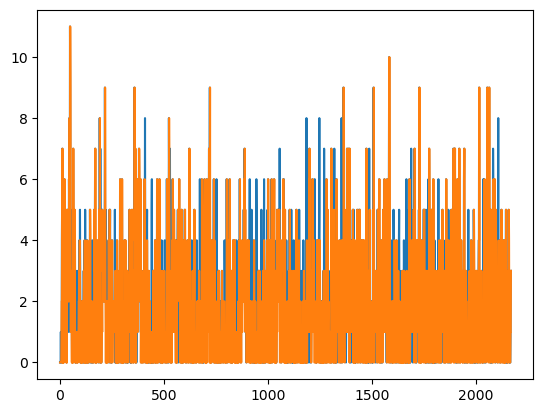

In [108]:
"""
IDentify stations in the cluster and station-level 10 min 
demand and inflow in order to create training dataset for xgboost
to make station-level demand predictions
"""

# specify the cluster of interest
cluster_num = 175 

######## find out coordinates of stations in the cluster ########
stat_cc_id_df = pd.read_csv("station_cc_id.csv")
stat_cc_id_df
selection = stat_cc_id_df[stat_cc_id_df.cc_id == cluster_num]
stat_coords = [] #station coordinates of chosen clsuter
for coords in zip(selection.x,selection.y):
    stat_coords.append(coords)
print(stat_coords)
######## find out coordinates of stations in the cluster ########


######## find out station ids of stations in the cluster ########
stat_id = [] #station ids of station coordinates 
station_ids_df = pd.read_csv("stations.csv")
for x_cor,y_cor in stat_coords:
    selection1 = station_ids_df[station_ids_df.x == x_cor ]
    stat_id.append(selection1.ID.values[0])
print(stat_id)
######## find out station ids of stations in the cluster ########


######## create 10 min demand time series dataset of all stations in cluster  ########
out_stat_df = pd.DataFrame()
all_outflow_df = pd.read_csv("outflow_station_dem.csv")
for stat in stat_id:
    out_stat_df[str(stat)] = all_outflow_df[str(stat)]
#print(out_stat_df)
######## create 10 min demand time series dataset of all stations in cluster  ########


# ######## tally aggregated station-wise demand with cluster-wise demand ########
clstr_outflow_df = pd.read_csv("outflow_clstr_dem.csv")
clstr_dem = clstr_outflow_df[str(cluster_num)]
clstr_dem = clstr_dem[:2172]

agg_stat_dem = []
agg_stat_dem.append(0)
#agg_stat_dem.append(sum(out_stat_df[:2].sum(axis=1)))


k=0
for i in range(2, ((((len(out_stat_df)-2)//6) * 6) - 6),6):
    tot = sum(out_stat_df.loc[i:i+6].sum(axis=1))
    if (clstr_dem[k] != tot):
        print('before error correction')
        print('diff = ',clstr_dem[k] - tot)
        #print(out_stat_df.loc[i:i+6])

        out_stat_df = error_correction(i,k,clstr_dem,tot,out_stat_df)
        
        tot = sum(out_stat_df.loc[i:i+6].sum(axis=1))
        print('after error correction')
        print('diff = ',clstr_dem[k] - tot)
        print("\n")

    k+=1
    agg_stat_dem.append(tot)

#print(len(clstr_dem))
#print(len(agg_stat_dem))

min_len = min(len(clstr_dem), len(agg_stat_dem))
clstr_dem = clstr_dem[:min_len]
agg_stat_dem = agg_stat_dem[:min_len]

#print(sum(np.array(clstr_dem) - np.array(agg_stat_dem)))

plt.plot(np.array(clstr_dem))
plt.plot(np.array(agg_stat_dem))
plt.show()
# ######## tally aggregated station-wise demand with cluster-wise demand ########


######## create 10 min inflow time series dataset of all stations in cluster  ########
# in_stat_df = pd.DataFrame()
# all_inflow_df = pd.read_csv("inflow_station_dem.csv")
# for stat in stat_id:
#     in_stat_df[str(stat)] = all_inflow_df[str(stat)]
# print(in_stat_df)
######## create 10 min inflow time series dataset of all stations in cluster  ########



######## tally aggregated station-wise demand with cluster-wise demand ########
# clstr_inflow_df = pd.read_csv("inflow_clstr_dem.csv")
# clstr_inf = clstr_inflow_df[str(cluster_num)]

# agg_stat_inf = []
# agg_stat_inf.append(0)
# agg_stat_inf.append(sum(in_stat_df[:2].sum(axis=1)))

# for i in range(2, ((((len(in_stat_df)-2)//6) * 6) - 6),6):
#     tot = sum(in_stat_df[i:i+6].sum(axis=1))
#     agg_stat_inf.append(tot)

# print(len(clstr_inf))
# print(len(agg_stat_inf))

# min_len = min(len(clstr_inf), len(agg_stat_inf))
# clstr_inf = clstr_inf[:min_len]
# agg_stat_inf = agg_stat_inf[:min_len]

# print(sum(np.array(clstr_inf)- np.array(agg_stat_inf)))

# plt.plot(np.array(clstr_inf)[100:500])
# plt.plot(np.array(agg_stat_inf)[100:500])
# plt.show()
######## tally aggregated station-wise inflow with cluster-wise inflow ########


In [109]:
out_stat_df[2]

KeyError: 2

In [ ]:
out_stat_df[1:2]['79'].values

1    0.0
Name: 79, dtype: float64